# Question 2 : Resolution analysis :
Poly:
https://josselin-garnier.org/wp-content/uploads/2025/01/polycopie-mva-2025.pdf#page=44.47

In [20]:
import numpy as np

In [21]:
z=0
N=64
w0=2*np.pi 
B=np.pi/4 
zref=np.array([5,100,0])
a=20
xn=np.zeros((N,3))
# print(xn)
for n in range(N):
    xn[n][0]=-a/2+a*(n-1)/(N-1)
M=64
M=60 
print("REMOE HERE ")
# discretize the frequency band
f0=w0-B
f1=w0+B
fband=np.linspace(f0,f1,M)

REMOE HERE 


In [22]:
import numpy as np

In [23]:
# 1 La green function , je ne sais pas comment elle s'écrit mais on va approximer par la partie 1 (?) 

class Green:
    def __init__(self):
        # self.c0=c0,
        # self.zref=zref
        pass 
    def __call__(self,w,x,y):
        return (1/(4*np.pi*np.linalg.norm(x-y)))*np.exp(1j*w*np.linalg.norm(x-y))

f=Green()
f(0,5,0)
# f(0,xn[0],zref)

f(1,5,6)

(0.04299589137143181+0.06696213335029096j)

In [24]:
xn_test=np.array([[5,0,0]])
zref_test=np.array([6,0,0])
f(w0,xn_test,zref_test)**2

(0.006332573977646112-3.102066580835253e-18j)

In [29]:
1/(4*np.pi)*np.exp(1j*1)==f(1,5,6)

True

In [25]:
rho_ref=1

class R_n:
    #correspond à Rnchapeau 
    def __init__(self,rho_ref,f0,f1,zref,xn):
        self.rho_ref=rho_ref
        self.f0=f0
        self.f1=f1
        self.xn=xn
        self.zref=zref
        self.green=Green()
    def __call__(self,n,w):
        def rn(n,w):
            # assert w in fband
            if w<self.f0 or w>self.f1:
                return 0 
            return self.rho_ref*self.green(w,self.xn[n],zref)**2
        return rn(n,w)

    
R_n(rho_ref,f0,f1,zref,xn)(0,w0)
# R_n(rho_ref,f0,f1,zref_test,xn_test)(0,w0)

(-3.070424805386075e-07+5.371818946225972e-07j)

# créons  l'imaging Function

In [26]:
Tn=1

In [82]:
class Imagingfun:
    def __init__(self,xn,rho_ref,f0,f1,zref,fband):
        self.xn=xn
        self.rho_ref=rho_ref
        self.f0=f0
        self.f1=f1
        self.zref=zref
        self.rn=R_n(rho_ref=rho_ref,f0=f0,f1=f1,zref=zref,xn=xn)
        self.fband=fband
        self.M=len(fband)
        self.N=len(xn)
        self.dw=(f1-f0)/self.M
        self.green=Green()
        self.second_term=self.constructR()
    
    def constructR(self):
        result=np.zeros((self.N,self.M),dtype=complex)
        for n in range(self.N):
            for k in range(self.M):
                w=self.fband[k]
                result[n,k]=self.rn(n,w)#+create_noise(1,noise)
        return result

    def R(self,w,x,x_n):
        if w<self.f0 or w>self.f1:
            print("out of f_n for w",w)
            return 0
        # add fn
        fn= np.exp(-2j*Tn*w)
        return self.green(w,x_n,x)**2*fn
    def __call__(self,x):
        # we compute  the integrale
        Somme=0
        for n in range(self.N):
            Somme_n=0
            for k in range(self.M):
                w=self.fband[k]
                first_term=np.conjugate(self.R(w=w,x=x,x_n=self.xn[n]))
                # second_term=self.rn(n,w)
                second_term=self.second_term[n,k]
                Somme_n+=first_term*second_term*self.dw
            Somme+=Somme_n
        print("whole somme",Somme)
        return np.real(Somme)

I_fun=Imagingfun(xn=xn,rho_ref=rho_ref,
             f0=f0,
             f1=f1,
             zref=zref,
             fband=fband)

I_fun(zref)

[[ 5.98260780e-07+1.57871820e-07j  4.96899683e-07-3.68687099e-07j
   2.23332776e-08-6.18337042e-07j ...  5.21458806e-07-3.33046823e-07j
   6.55065231e-08-6.15262845e-07j -4.39645594e-07-4.35374809e-07j]
 [ 5.97677843e-07-1.62301346e-07j  2.45023576e-07-5.68791682e-07j
  -2.92630661e-07-5.45827653e-07j ...  2.03525221e-07-5.84925649e-07j
  -3.31089730e-07-5.23392894e-07j -6.15722245e-07-6.66831864e-08j]
 [ 4.41734490e-07-4.34901257e-07j -6.69236637e-08-6.16270790e-07j
  -5.24792284e-07-3.29941693e-07j ... -1.94436575e-07-5.88610976e-07j
  -5.82229211e-07-2.12785357e-07j -5.28157965e-07+3.24526773e-07j]
 ...
 [ 3.92823909e-07+4.95372130e-07j  6.31308706e-07-3.39630389e-08j
   3.37410568e-07-5.34657161e-07j ... -6.30405217e-07+4.78898052e-08j
  -3.25526733e-07+5.41974646e-07j  2.53868601e-07+5.79012007e-07j]
 [ 3.16109865e-07+5.47325918e-07j  6.29282646e-07+5.91139516e-08j
   4.12510278e-07-4.78880338e-07j ... -6.28137262e-07-7.02473313e-08j
  -4.20925093e-07+4.71500979e-07j  1.40765644e-

2.4921495557581665e-11

# Cas 1 : No noise

In [56]:
l_inf_x=0
l_sup_x=10

l_inf_y=80
l_sup_y=120
res=10
x=np.meshgrid(np.linspace(l_inf_x,l_sup_x,res),
               np.linspace(l_inf_y,l_sup_y,res))

In [108]:
def compute_grid(l_inf_x,l_sup_x,l_inf_y,l_sup_y,res,zref,I_fun):
    x=np.meshgrid(np.linspace(l_inf_x,l_sup_x,res),
               np.linspace(l_inf_y,l_sup_y,res))
    # compute the imaging function on the grid 
    I_grid=np.zeros((res,res))
    for i in range(res):
        for j in range(res):
            I_grid[i,j]=I_fun(np.array([x[0][i,j],x[1][i,j],zref[2]]))
    return I_grid
# plot the imaging function
def plot_result(I_grid,zref):
    import matplotlib.pyplot as plt
    fig = plt.figure()
    plt.imshow(I_grid, extent=(l_inf_x,l_sup_x,l_inf_y,l_sup_y),origin='lower')
    # add a point where the I_fun is maximum
    max_I=np.max(I_grid)
    max_I_index=np.unravel_index(np.argmax(I_grid, axis=None), I_grid.shape)
    plt.scatter(x[0][max_I_index],x[1][max_I_index],s=100,c='green',label='Maximum found',marker='x')
    plt.colorbar()
    plt.title('Imaging function with no noise')


    plt.scatter(zref[0],zref[1],s=100,c='red',label='zref',marker="x")
    # put the legend out of the img
    plt.legend(loc="upper left", bbox_to_anchor=(5, 1))
    max_I_coords=x[0][max_I_index],x[1][max_I_index]

    print("Difference between the ground truth and the maxima",np.linalg.norm(max_I_coords-zref[:2]))
    return max_I_index,max_I

In [ ]:
l_inf_x=0
l_sup_x=10

l_inf_y=80
l_sup_y=120
res=15
x=np.meshgrid(np.linspace(l_inf_x,l_sup_x,res),
               np.linspace(l_inf_y,l_sup_y,res))
I_grid= compute_grid(l_inf_x,l_sup_x,l_inf_y,l_sup_y,res,zref,I_fun)


whole somme (-3.4346192345772664e-14+3.4028053064703133e-14j)
whole somme (-2.3564610512393934e-13-4.368902038615705e-14j)
whole somme (-3.5744630103460356e-13+1.2565852830969744e-14j)
whole somme (-9.930794527212353e-14+3.056107063823144e-13j)
whole somme (6.489914905861033e-13+4.788821990017059e-13j)
whole somme (1.3698481609663314e-12+8.624583282311076e-14j)
whole somme (1.331268977108391e-12-5.643198627632527e-13j)
whole somme (7.169564630157637e-13-6.589203919298699e-13j)
whole somme (4.2509661623744227e-13-2.5205520003206506e-13j)
whole somme (4.950313710983806e-13-1.2435629968953719e-13j)
whole somme (3.328643968962099e-13-2.0799344448944943e-13j)
whole somme (1.4831783992850313e-13-6.577714556941661e-14j)
whole somme (1.8322073474668616e-13+1.1566009407636026e-14j)
whole somme (1.538453003906006e-13-2.7694311709827913e-14j)
whole somme (1.189446136819657e-13-2.730244646400235e-14j)
whole somme (-2.0510560577834793e-13-1.786284957970079e-13j)
whole somme (-3.539621396287449e-13+

max I coords 0.0


((7, 7), 2.4921495557581665e-11)

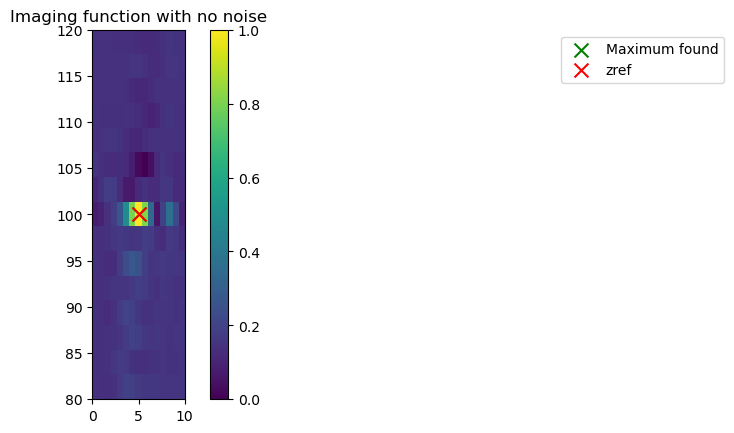

In [45]:
plot_result(I_grid,zref)

In [ ]:
l_inf_x=0
l_sup_x=10

l_inf_y=80
l_sup_y=120
res=40
x=np.meshgrid(np.linspace(l_inf_x,l_sup_x,res),
               np.linspace(l_inf_y,l_sup_y,res))
x=np.meshgrid(np.linspace(l_inf_x,l_sup_x,res),
               np.linspace(l_inf_y,l_sup_y,res))
I_grid= compute_grid(l_inf_x,l_sup_x,l_inf_y,l_sup_y,res,zref,I_fun=I_fun)

whole somme (-3.4346192345772664e-14+3.4028053064703133e-14j)
whole somme (-1.0170972132860837e-13+7.319543995452511e-15j)
whole somme (-1.7652535747902858e-13-2.3909057588961717e-14j)
whole somme (-2.5111624908220797e-13-4.7397050182310715e-14j)
whole somme (-3.1459715400873663e-13-4.9941494216011354e-14j)
whole somme (-3.529549213896084e-13-2.068822319975491e-14j)
whole somme (-3.5015953631263613e-13+4.536896075214479e-14j)
whole somme (-2.905770382422139e-13+1.4449505648418104e-13j)
whole somme (-1.6258276810660601e-13+2.628443720161673e-13j)
whole somme (3.722286360068568e-14+3.774150822174255e-13j)
whole somme (3.0027726536648046e-13+4.597251577766734e-13j)
whole somme (6.04162425890718e-13+4.819290238318852e-13j)
whole somme (9.138192955133714e-13+4.242619894923431e-13j)
whole somme (1.1865348371050761e-12+2.8194777456110314e-13j)
whole somme (1.3803111224731275e-12+6.9338061747771e-14j)
whole somme (1.4639529413728747e-12-1.8065105932119716e-13j)
whole somme (1.426140257766238e-

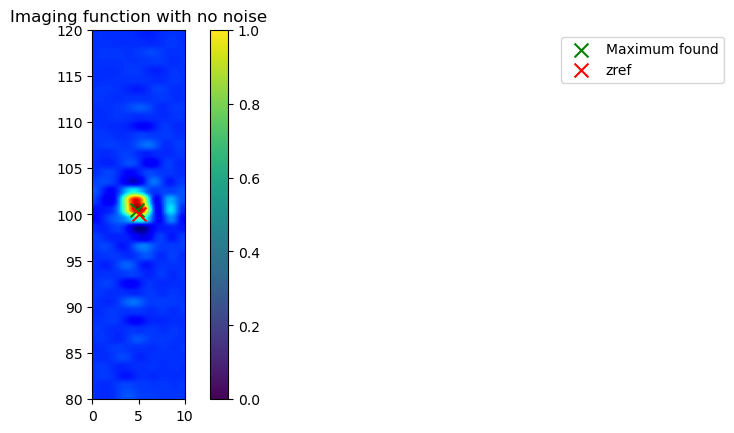

In [ ]:

max_I_index,max_I= plot_result(I_grid,zref)



In [118]:
max_I_coords=x[0][max_I_index],x[1][max_I_index]
print("max I coords",np.linalg.norm(max_I_coords-zref[:2]))

max I coords 0.5286032853355959


# Stability Analysis

## First case: Data corrupted by an additive Gaussian Noise

In [15]:
z=0
N=64
w0=2*np.pi 
B=np.pi/4 
zref=np.array([5,100,0])
a=20
xn=np.zeros((N,3))
# print(xn)
for n in range(N):
    xn[n][0]=-a/2+a*(n-1)/(N-1)
M=64
M=60 
print("REMOE HERE ")
# discretize the frequency band
f0=w0-B
f1=w0+B
fband=np.linspace(f0,f1,M)


REMOE HERE 


In [16]:
noise=0.01

In [17]:
import numpy as np 
n=2
z = np.random.randn(n, 2).view(np.complex128)*1/2
n=100000
z = np.random.normal(loc=0, scale=np.sqrt(2)/2, size=(n, 2)).view(np.complex128)                                                                                       
np.var(z)  

1.0013048096203987

In [68]:
#create an complex zero mean gaussian noise
def create_noise(n,sigma):
    z = np.random.normal(loc=0, scale=np.sqrt(2)/2, size=(n, 2)).view(np.complex128)        
    return z*sigma


In [70]:
class Imagingfun_antennaNoise(Imagingfun):
    def __init__(self,xn,rho_ref,f0,f1,zref,fband,noise):
        self.noise=noise
        super().__init__(xn=xn,rho_ref=rho_ref,f0=f0,f1=f1,zref=zref,fband=fband)
    
    def constructR(self):
        result=np.zeros((self.N,self.M),dtype=complex)
        for n in range(self.N):
            for k in range(self.M):
                w=self.fband[k]
                result[n,k]=self.rn(n,w)+create_noise(1,self.noise).squeeze()
        return result

    def R(self,w,x,x_n):
        if w<self.f0 or w>self.f1:
            print("out of f_n for w",w)
            return 0
        # add fn
        fn= np.exp(-2j*Tn*w)
        return self.green(w,x_n,x)**2*fn
    def __call__(self,x):
        # we compute  the integrale
        Somme=0
        for n in range(self.N):
            Somme_n=0
            for k in range(self.M):
                w=self.fband[k]
                first_term=np.conjugate(self.R(w=w,x=x,x_n=self.xn[n]))
                second_term=self.second_term[n,k]
                Somme_n+=first_term*second_term*self.dw
            Somme+=Somme_n
        return np.real(Somme)

I_fun=Imagingfun_antennaNoise(xn=xn,rho_ref=rho_ref,
             f0=f0,
             f1=f1,
             zref=zref,
             fband=fband,noise=1)


I_fun(zref)

3.362001050152865e-07

In [88]:
l_inf_x=-10
l_sup_x=10

l_inf_y=60
l_sup_y=140
res=20
noise=1e-7


In [ ]:
x=np.meshgrid(np.linspace(l_inf_x,l_sup_x,res),
               np.linspace(l_inf_y,l_sup_y,res))
import matplotlib.pyplot as plt 
for noise in [10**-k for k in range(1,7)]:
        
    I_fun=Imagingfun_antennaNoise(xn=xn,rho_ref=rho_ref,
                f0=f0,
                f1=f1,
                zref=zref,
                fband=fband,noise=noise)
    I_grid= compute_grid(l_inf_x,l_sup_x,l_inf_y,l_sup_y,res,zref)
    plot_result(I_grid,zref)
    # write noise in scientific notation
    plt.title('Imaging function with noise of level {}'.format(noise))

KeyboardInterrupt: 

max I coords 36.00650141355476
max I coords 40.07005637982742
max I coords 27.4000323513164
max I coords 38.805752493577515
max I coords 40.53742158150237
max I coords 36.067995189756665
max I coords 33.72633057362184
max I coords 35.790441163393886
max I coords 35.790441163393886
max I coords 2.4826266136991086


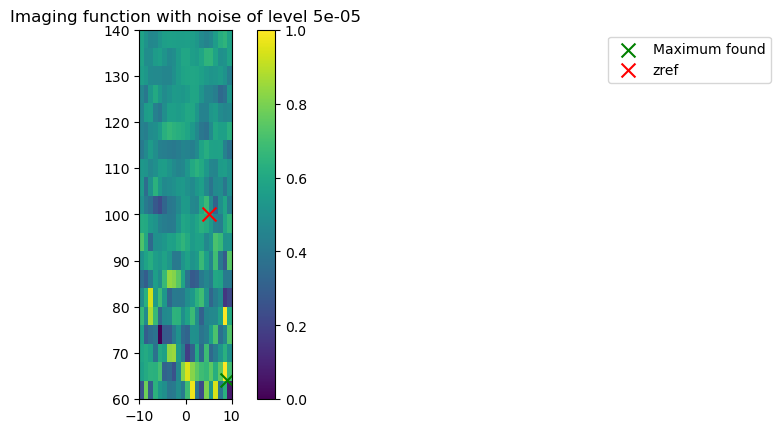

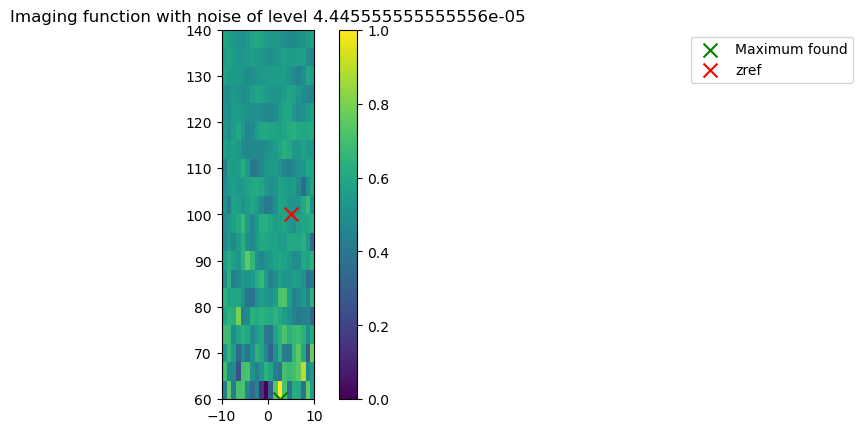

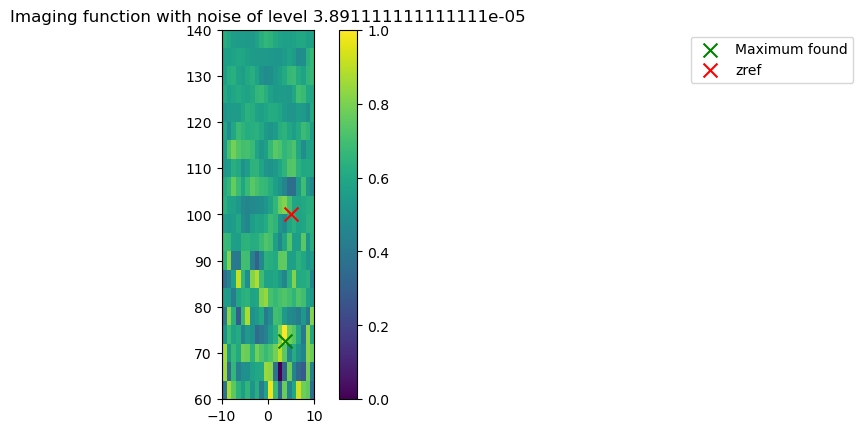

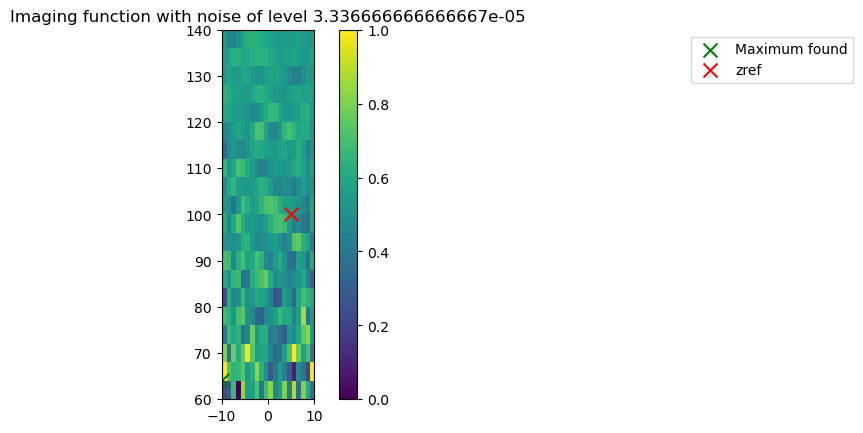

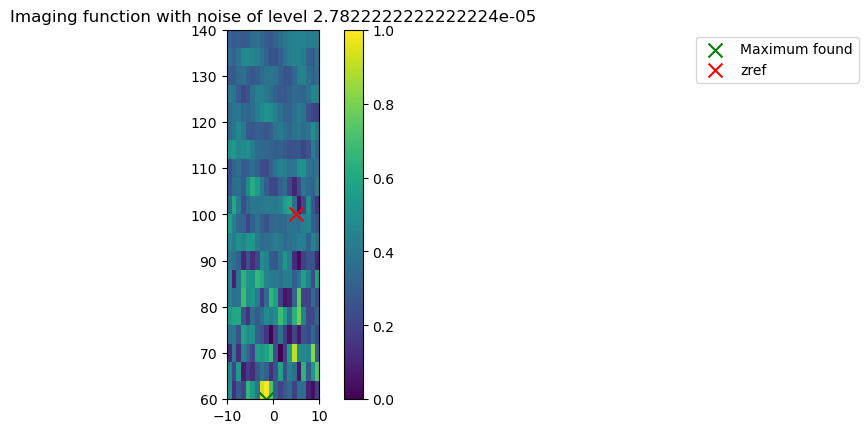

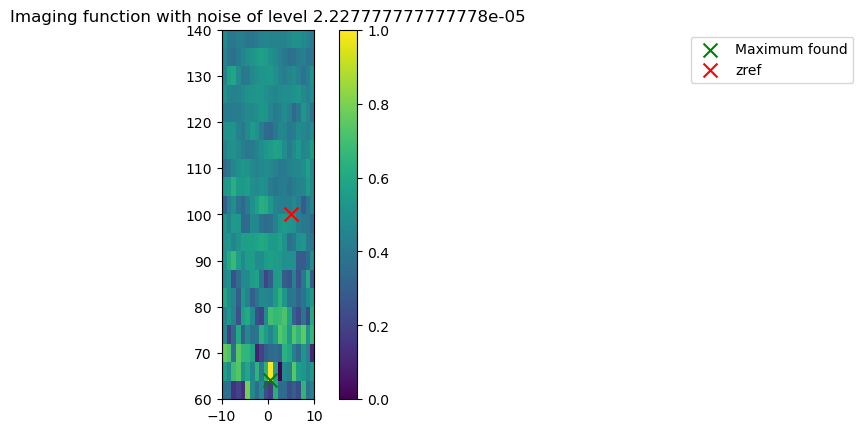

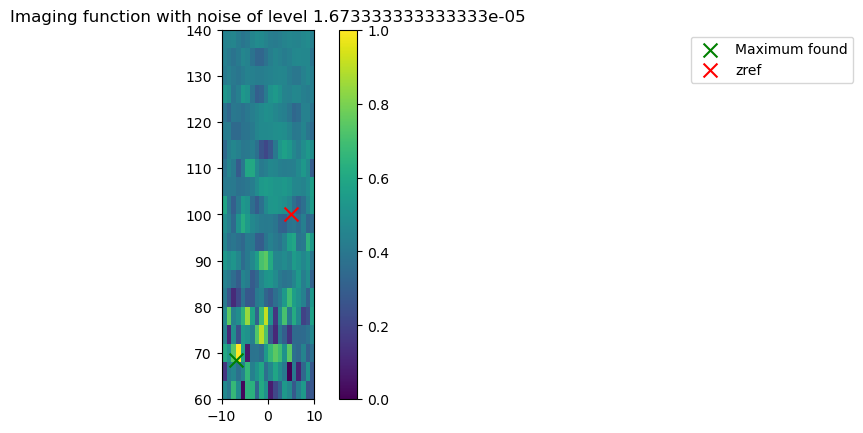

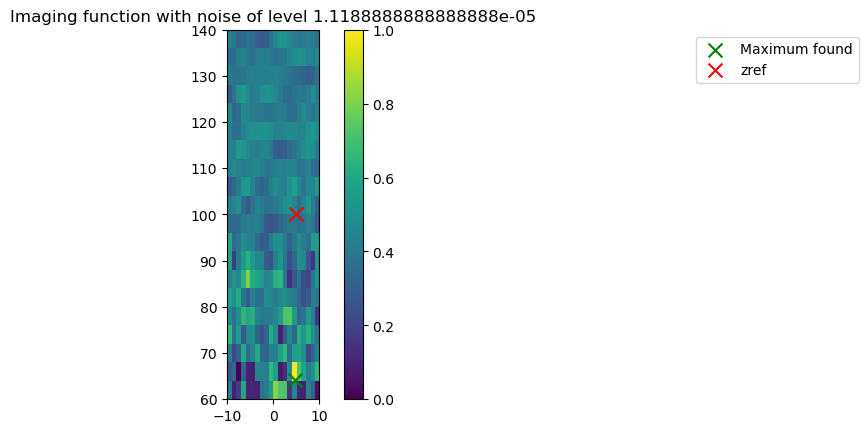

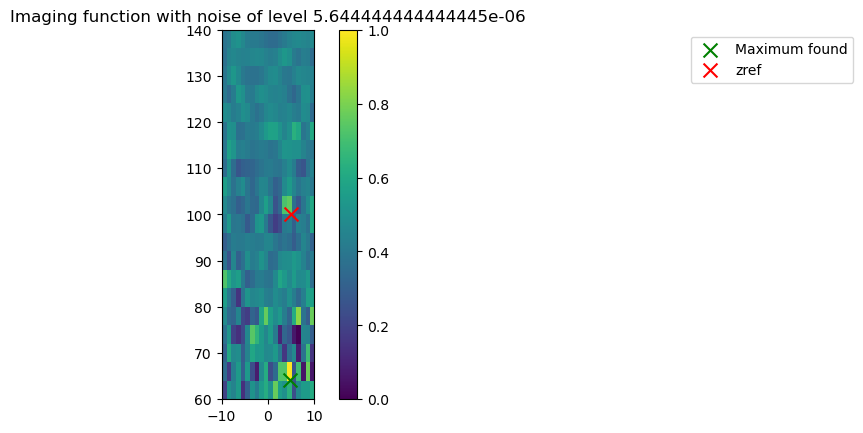

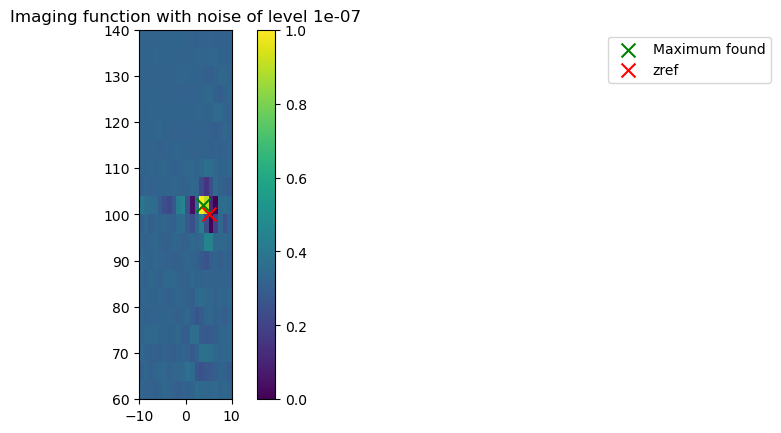

In [94]:
x=np.meshgrid(np.linspace(l_inf_x,l_sup_x,res),
               np.linspace(l_inf_y,l_sup_y,res))
import matplotlib.pyplot as plt 
for noise in np.linspace(5e-5,1e-07,10):
        
    I_fun=Imagingfun_antennaNoise(xn=xn,rho_ref=rho_ref,
                f0=f0,
                f1=f1,
                zref=zref,
                fband=fband,noise=noise)
    I_grid= compute_grid(l_inf_x,l_sup_x,l_inf_y,l_sup_y,res,zref)
    plot_result(I_grid,zref)
    # write noise in scientific notation
    plt.title('Imaging function with noise of level {}'.format(noise))

max I coords 38.0415649628133
max I coords 42.720018726587654
max I coords 2.4826266136991086
max I coords 2.4826266136991086
max I coords 2.4826266136991086


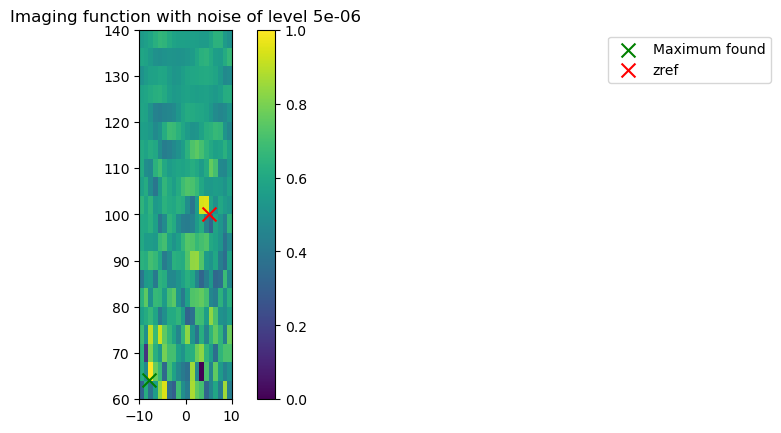

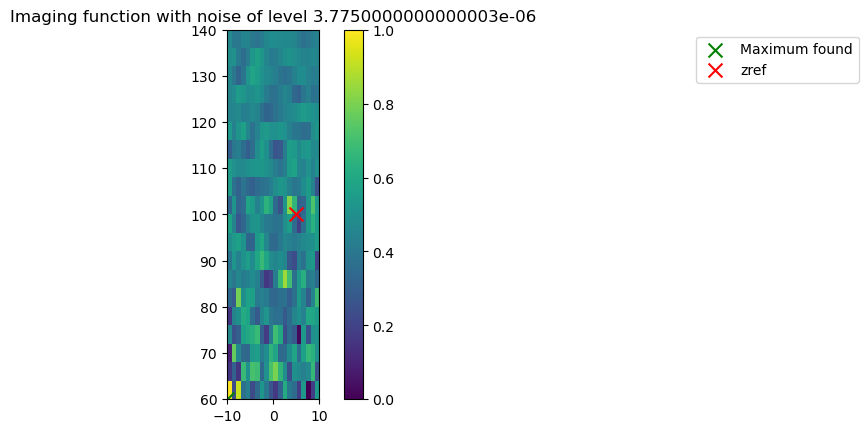

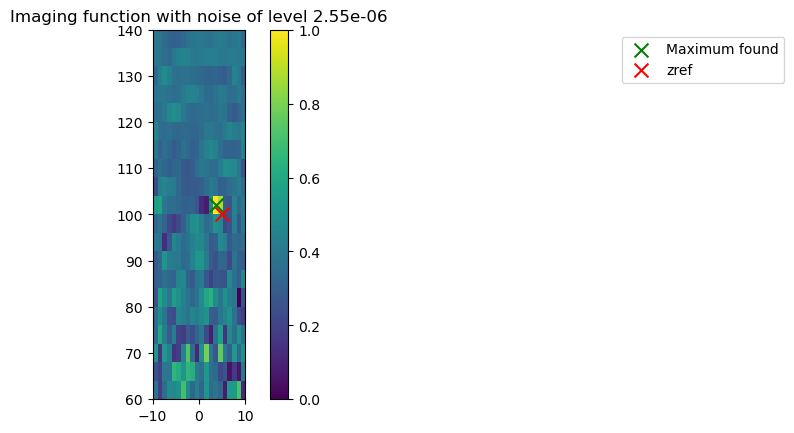

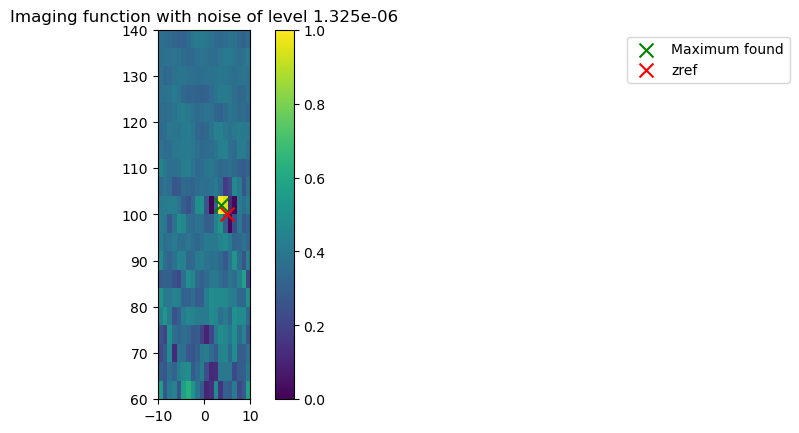

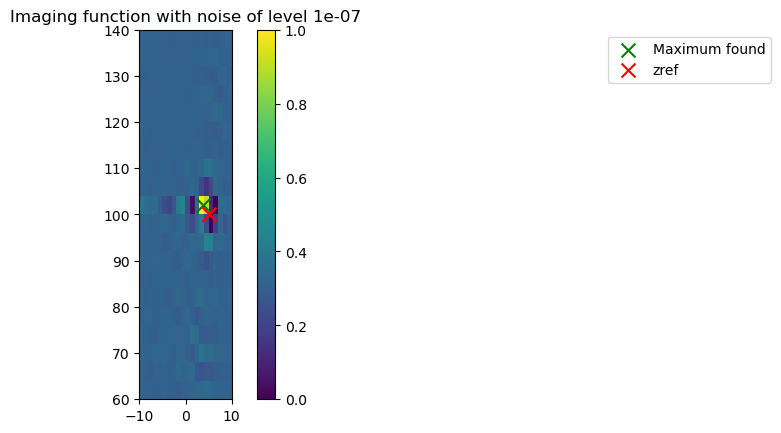

In [107]:
x=np.meshgrid(np.linspace(l_inf_x,l_sup_x,res),
               np.linspace(l_inf_y,l_sup_y,res))
import matplotlib.pyplot as plt 
for noise in np.linspace(5e-6,1e-07,5):
        
    I_fun=Imagingfun_antennaNoise(xn=xn,rho_ref=rho_ref,
                f0=f0,
                f1=f1,
                zref=zref,
                fband=fband,noise=noise)
    I_grid= compute_grid(l_inf_x,l_sup_x,l_inf_y,l_sup_y,res,zref)
    plot_result(I_grid,zref)
    # write noise in scientific notation
    plt.title('Imaging function with noise of level {}'.format(noise))
    plt.plot()

## Dernier cas:  Unknown xn position

In [101]:
z=0
N=64
w0=2*np.pi 
B=np.pi/4 
zref=np.array([5,100,0])
a=20
xn=np.zeros((N,3))
# print(xn)
for n in range(N):
    xn[n][0]=-a/2+a*(n-1)/(N-1)
M=64

# discretize the frequency band
f0=w0-B
f1=w0+B
fband=np.linspace(f0,f1,M)


In [103]:
xn.shape

(64, 3)

In [105]:
xn.shape
sigma=1 


AttributeError: 'int' object has no attribute 'shape'

In [114]:
class Imagingfun_positionNoise(Imagingfun):
    def __init__(self,xn,rho_ref,f0,f1,zref,fband,noise):
        self.noise=noise
        super().__init__(xn=xn,rho_ref=rho_ref,f0=f0,f1=f1,zref=zref,fband=fband)
        xn_noised=xn+np.random.randn(xn.shape[0],xn.shape[1])*self.noise
        self.rn=R_n(rho_ref=rho_ref,f0=f0,f1=f1,zref=zref,xn=xn_noised)
        self.second_term=self.constructR()

    # def constructR(self):
    #     result=np.zeros((self.N,self.M),dtype=complex)
    #     for n in range(self.N):
    #         for k in range(self.M):
    #             w=self.fband[k]
    #             result[n,k]=self.rn(n,w)+create_noise(1,self.noise).squeeze()
    #     return result
    def __call__(self,x):
        # we compute  the integrale
        Somme=0
        for n in range(self.N):
            Somme_n=0
            for k in range(self.M):
                w=self.fband[k]
                first_term=np.conjugate(self.R(w=w,x=x,x_n=self.xn[n]))
                second_term=self.second_term[n,k]
                Somme_n+=first_term*second_term*self.dw
            Somme+=Somme_n
        return np.real(Somme)

I_fun=Imagingfun_positionNoise(xn=xn,rho_ref=rho_ref,
             f0=f0,
             f1=f1,
             zref=zref,
             fband=fband,noise=1)


I_fun(zref)

-3.709280636746989e-12

Difference between the ground truth and the maxima 0.5286032853355959
Difference between the ground truth and the maxima 0.5286032853355959
Difference between the ground truth and the maxima 4.501807657969085
Difference between the ground truth and the maxima 10.806559237377705


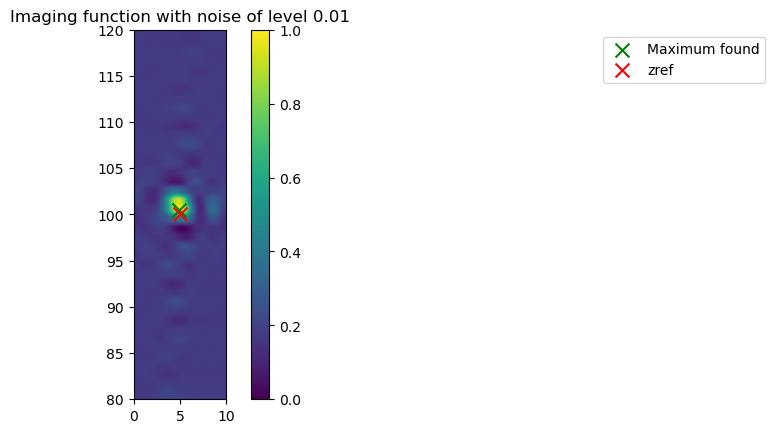

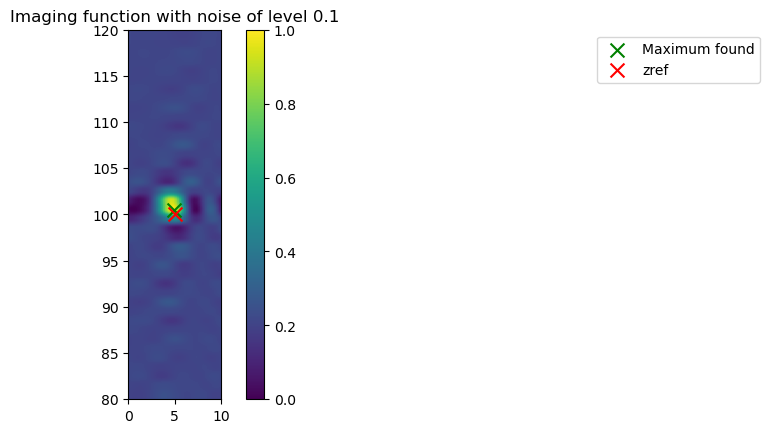

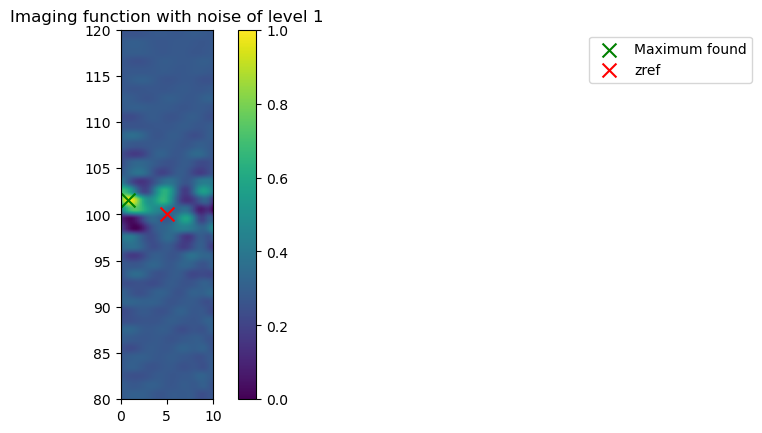

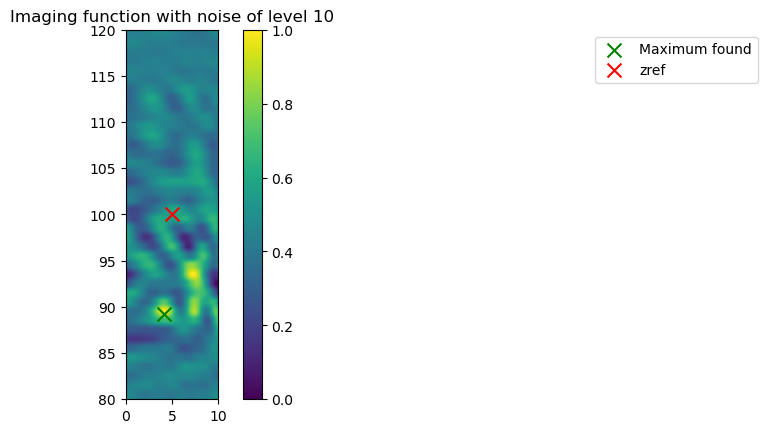

In [117]:
l_inf_x=0
l_sup_x=10

l_inf_y=80
l_sup_y=120
res=40
x=np.meshgrid(np.linspace(l_inf_x,l_sup_x,res),
               np.linspace(l_inf_y,l_sup_y,res))
for noise in [10**k for k in range(-2,2)]:
    I_fun=Imagingfun_positionNoise(xn=xn,rho_ref=rho_ref,
             f0=f0,
             f1=f1,
             zref=zref,
             fband=fband,noise=noise)

    I_grid= compute_grid(l_inf_x,l_sup_x,l_inf_y,l_sup_y,res,zref,I_fun=I_fun)
    max_I_index,max_I= plot_result(I_grid,zref)
    plt.title('Imaging function with noise of level {}'.format(noise))
    plt.plot()

Difference between the ground truth and the maxima 0.5286032853355959
Difference between the ground truth and the maxima 0.5286032853355959
Difference between the ground truth and the maxima 4.501807657969085
Difference between the ground truth and the maxima 4.2617359329729885
Difference between the ground truth and the maxima 3.5366959549060866
Difference between the ground truth and the maxima 2.992978853827885
Difference between the ground truth and the maxima 3.75314901751396
Difference between the ground truth and the maxima 1.585809856006787
Difference between the ground truth and the maxima 1.7437782703506974
Difference between the ground truth and the maxima 5.231334811052092


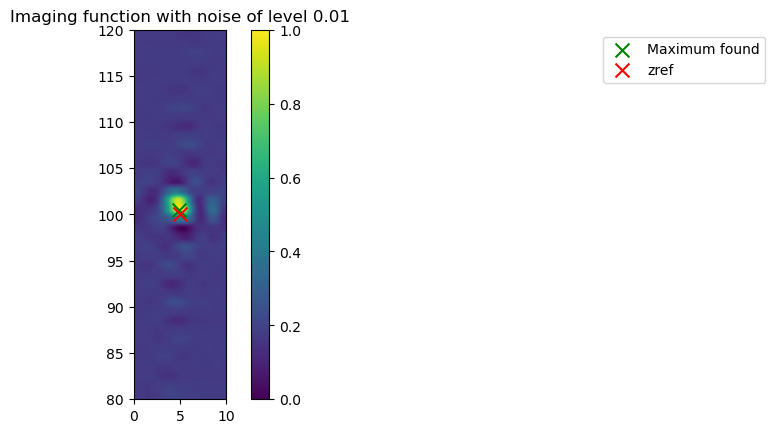

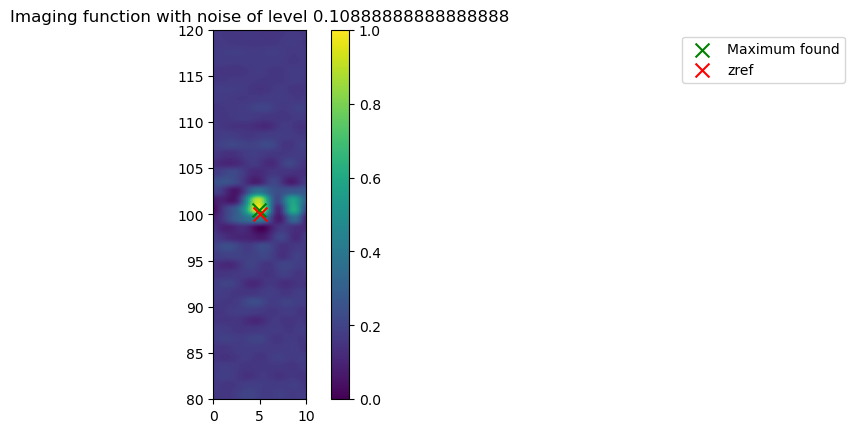

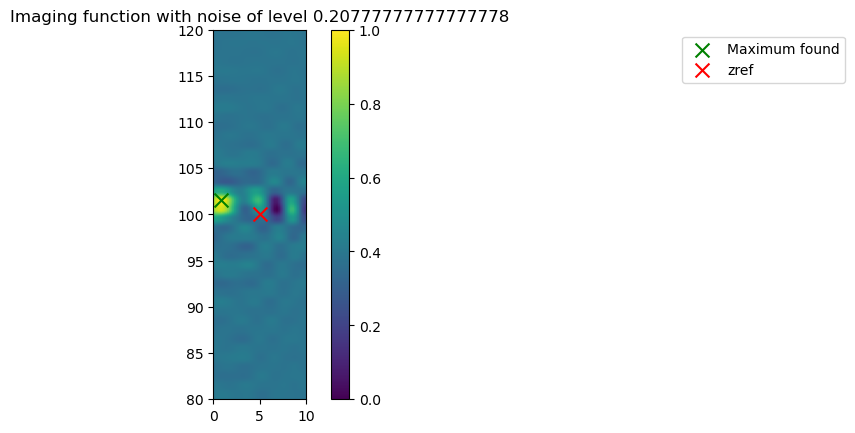

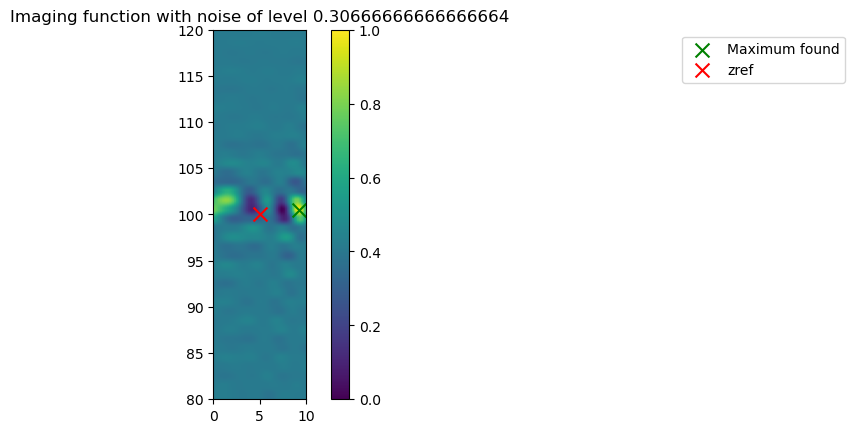

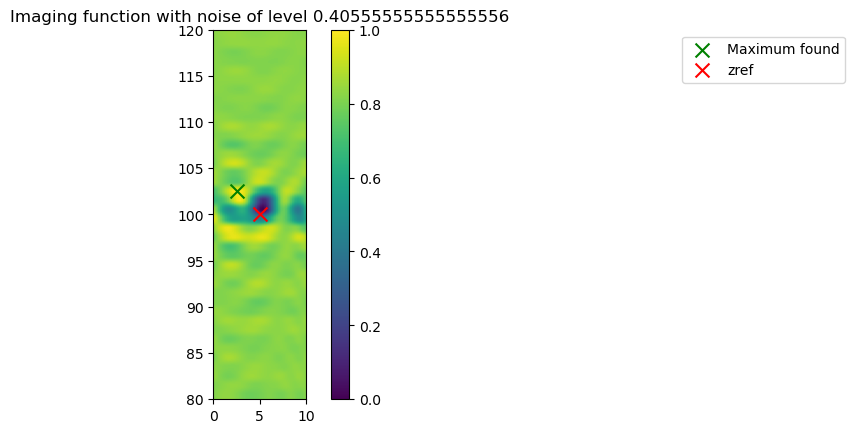

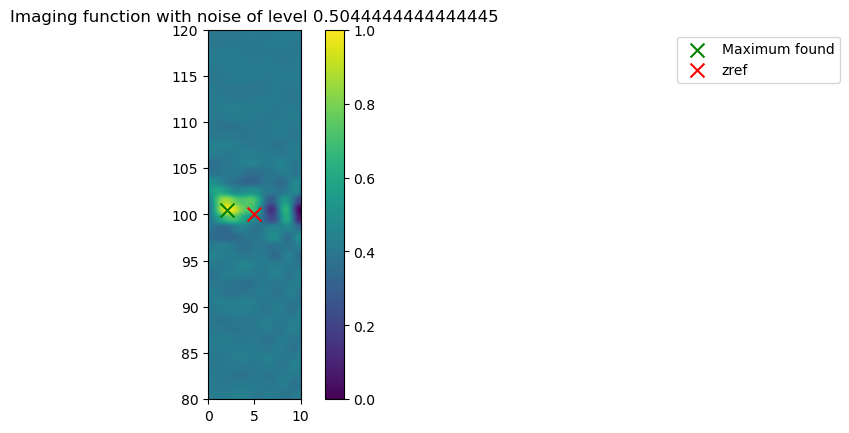

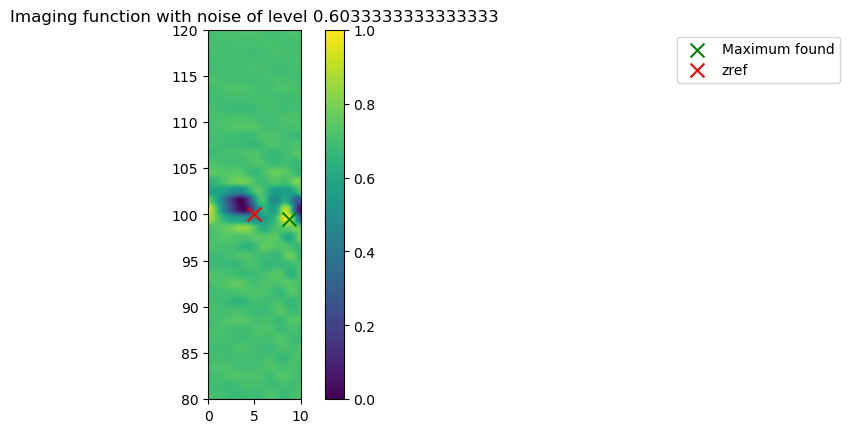

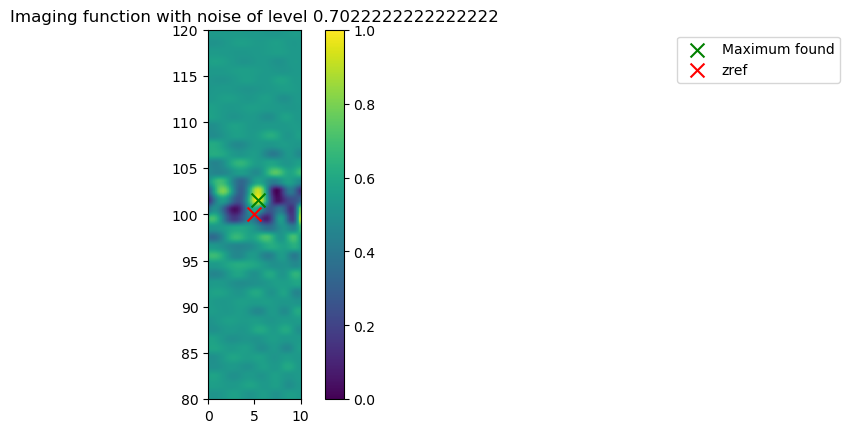

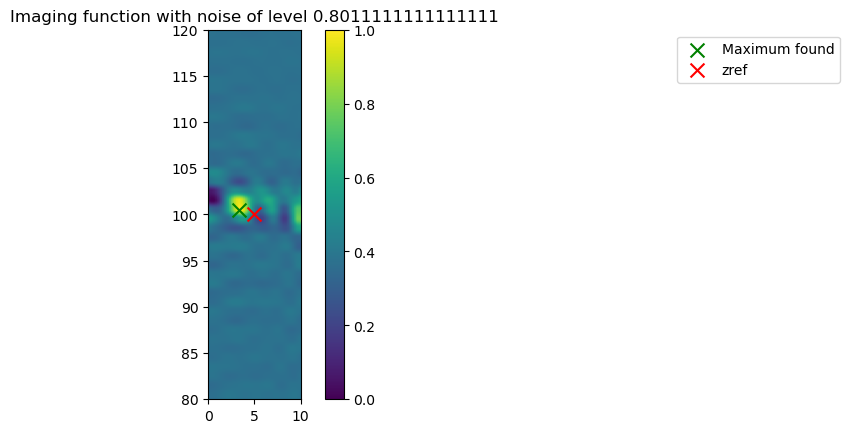

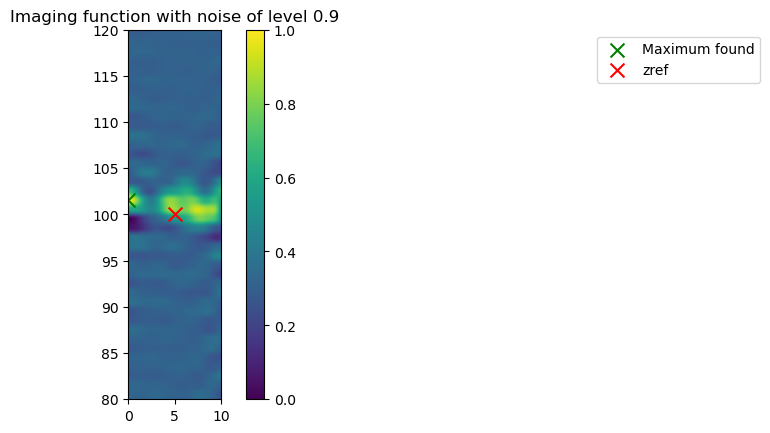

In [118]:
l_inf_x=0
l_sup_x=10

l_inf_y=80
l_sup_y=120
res=40
x=np.meshgrid(np.linspace(l_inf_x,l_sup_x,res),
               np.linspace(l_inf_y,l_sup_y,res))
for noise in np.linspace(0.01,0.9,10):
    I_fun=Imagingfun_positionNoise(xn=xn,rho_ref=rho_ref,
             f0=f0,
             f1=f1,
             zref=zref,
             fband=fband,noise=noise)

    I_grid= compute_grid(l_inf_x,l_sup_x,l_inf_y,l_sup_y,res,zref,I_fun=I_fun)
    max_I_index,max_I= plot_result(I_grid,zref)
    plt.title('Imaging function with noise of level {}'.format(noise))
    plt.plot()